In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dataset 1: Standford Open Policing Project.
#### NOTE: ALL the questions are put up and answered by me, hypothetically. However, for good accurate Q & A, an expert is needed.

In [201]:
df = pd.read_csv('police.csv')
print(df.shape,'\n')
df.head()

(91741, 15) 



,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# 1. Dataset Datatypes

In [202]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

# 2. Null values Count

In [203]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

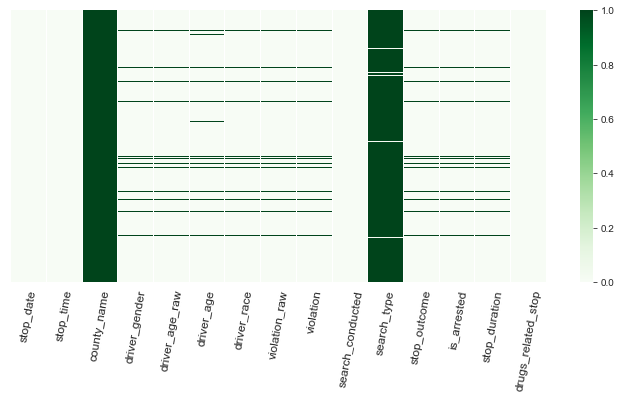

In [213]:
# visualization of Null values
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), yticklabels=False, cmap="Greens")
plt.xticks(rotation=80, fontsize=12)

# 2.1 Remove the column that only contains missing values

In [214]:
print('Length of column: ',len(df.county_name))
print('No. of missing values: ',df.county_name.isnull().sum(), '\n')
print('As all of the values in this column is missing so we will remove this column.')

Length of column:  91741
No. of missing values:  91741 

As all of the values in this column is missing so we will remove this column.


In [215]:
df1 = df.copy() 
df1.drop('county_name', axis='columns', inplace=True)

In [216]:
print(df1.shape)
df1.head()

(91741, 14)


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


# 3. Do women and men speed more often?
### columns: driver_gender, violation

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64


Text(0, 0.5, 'Count')

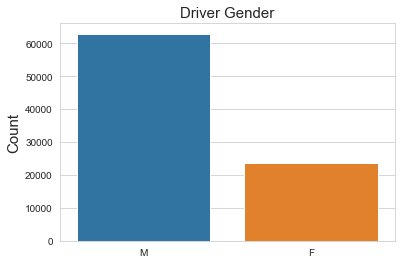

In [217]:
# calculate and print No. of drivers of each gender
print(df1[df1.violation == 'Speeding'].driver_gender.value_counts(normalize=True))

#visualise it
sns.countplot(x='driver_gender', data=df1)
plt.title('Driver Gender',fontsize=15)
plt.xlabel(None)
plt.ylabel('Count',fontsize=15)

In [218]:
print('Violation by MALE:')
df1[df1.driver_gender == 'M'].violation.value_counts(normalize=True)

Violation by MALE:


Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [219]:
print('Violation by FEMALE:')
df1[df1.driver_gender == 'F'].violation.value_counts(normalize=True)

Violation by FEMALE:


Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

#### Okay! I did Filtering and counted the values of Male and Female in normalize form.
#### But pandas has a function which can do the above process in 1 line of code and i.e groupby.

In [220]:
df1.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

#### we can represent above data in a structured table by using 'unstack()'

In [221]:
df1.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


#### OR

In [222]:
df1.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

### So the answer of the above question is <strong>Yes, women and men speed more often.</strong>

# 4. Does gender effect who gets searched during a stop?
### columns: driver_gender, search_conducted

In [223]:
df1.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [224]:
print('Percentage of Drivers gets searched:' ,round(df1.search_conducted.mean() * 100,2) ,'%')

Percentage of Drivers gets searched: 3.48 %


In [225]:
df1.groupby('driver_gender').search_conducted.value_counts(normalize=True).unstack()

search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


C:\Users\Aman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, "Driver's Gender")

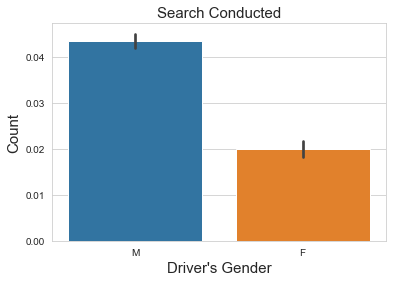

In [226]:
sns.barplot('driver_gender', 'search_conducted', data=df1)
plt.title('Search Conducted', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel("Driver's Gender", fontsize=15)

#### The above study shows that Males are searched during a stop more than Females.
#### But Why Males are often searched during a stop than Females?
##### Lets compare the violation w.r.t gender.

In [227]:
df1.groupby(['violation', 'driver_gender']).search_conducted.mean().unstack()

driver_gender,F,M
violation,,
Equipment,0.042622,0.070081
Moving violation,0.036205,0.059831
Other,0.056522,0.047146
Registration/plates,0.066140,0.110376
Seat belt,0.012598,0.037980
Speeding,0.008720,0.024925


#### We can clearly observe here that Males do more violation than Females. This gives us the answer to the ques Why Males are often searched during a stop than Females.

# 5. Why is search_type missing so often?

In [228]:
print(df1.search_conducted.value_counts())
df1.search_conducted.value_counts(normalize=True)

False    88545
True      3196
Name: search_conducted, dtype: int64


False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

##### Search was condcuted only 3.48% times

In [229]:
df1.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

In [230]:
df1[df1.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

##### when the search_conducted = False, then the search_type = NaN

In [231]:
df1[df1.search_conducted == False].search_type.value_counts(dropna= False)

NaN    88545
Name: search_type, dtype: int64

##### See, there were 88545 NaN values, which was by default hidden by pandas. 

#### So the answer to the above asked question is : <strong> The search_type is missing so often because search was only conducted 3.48% times. </strong>

# 6.During a search, how often is the driver Frisked?

In [232]:
df1['Frisk'] = df1.search_type.str.contains('Protective Frisk')

In [233]:
df1.Frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: Frisk, dtype: int64

In [234]:
print('No. of times the driver is frisked:',df1.Frisk.sum())

No. of times the driver is frisked: 274


In [235]:
print('% of times the driver is frisked:',round(df1.Frisk.mean()*100, 2),'%')

% of times the driver is frisked: 8.57 %


#### Answer: Driver is Frisked about 8.57% while searching.

# 7. Which year had the least number of stops?

In [261]:
df1.stop_date.str.slice(0,4).value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_date, dtype: int64

#### Answer: 2005 had the least number of stops.

## OR

###### Using string Date time function

In [262]:
combined = df1.stop_date.str.cat(df1.stop_time, sep=' ; ')
combined.head()

0    2005-01-02 ; 01:55
1    2005-01-18 ; 08:15
2    2005-01-23 ; 23:15
3    2005-02-20 ; 17:15
4    2005-03-14 ; 10:00
Name: stop_date, dtype: object

In [263]:
df1['stop_datetime'] = pd.to_datetime(combined)

In [264]:
df1.stop_datetime.value_counts()

2013-01-22 22:10:00    21
2015-01-10 09:11:00    12
2012-07-15 09:34:00     6
2012-07-21 10:45:00     5
2007-03-23 09:45:00     5
                       ..
2012-08-08 19:19:00     1
2006-08-21 03:00:00     1
2012-01-31 00:28:00     1
2011-01-15 10:25:00     1
2013-10-10 02:54:00     1
Name: stop_datetime, Length: 88620, dtype: int64

In [265]:
df1.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

#### Answer: 2005 had the least number of stops.

# 8. How does drug activity change by time of day?
### columns: stop_datetime, drugs_related_stop

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text xticklabel objects>)

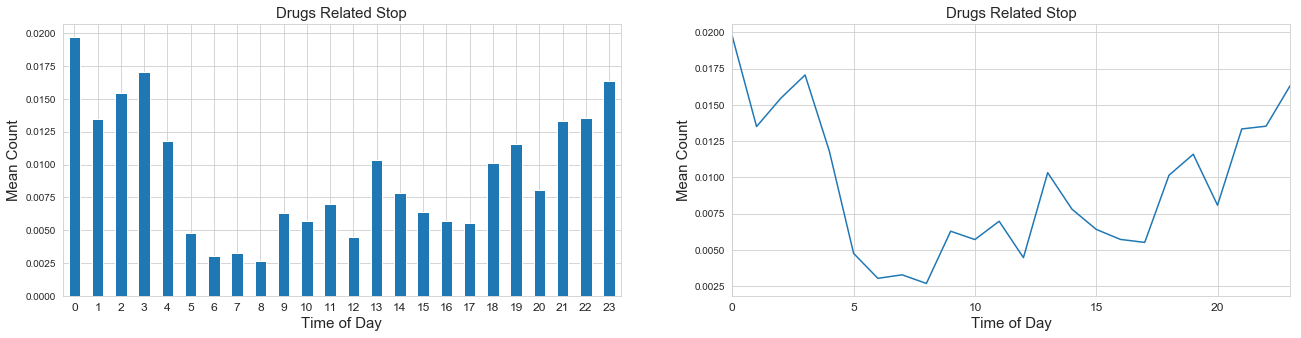

In [300]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
df1.groupby(df1.stop_datetime.dt.hour).drugs_related_stop.mean().plot.bar() # visualization via barplot
plt.title('Drugs Related Stop', fontsize=15)
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel('Mean Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)

plt.subplot(1,2,2)
df1.groupby(df1.stop_datetime.dt.hour).drugs_related_stop.mean().plot() # # visualization via lineplot
plt.title('Drugs Related Stop', fontsize=15)
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel('Mean Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)

#### ANSWER: From the above diagram, we can conclude that drugs related stop is maximum at night(specially 11pm-12am O'clock)

# 9. Do most stops occur at night?

In [301]:
df1.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text xticklabel objects>)

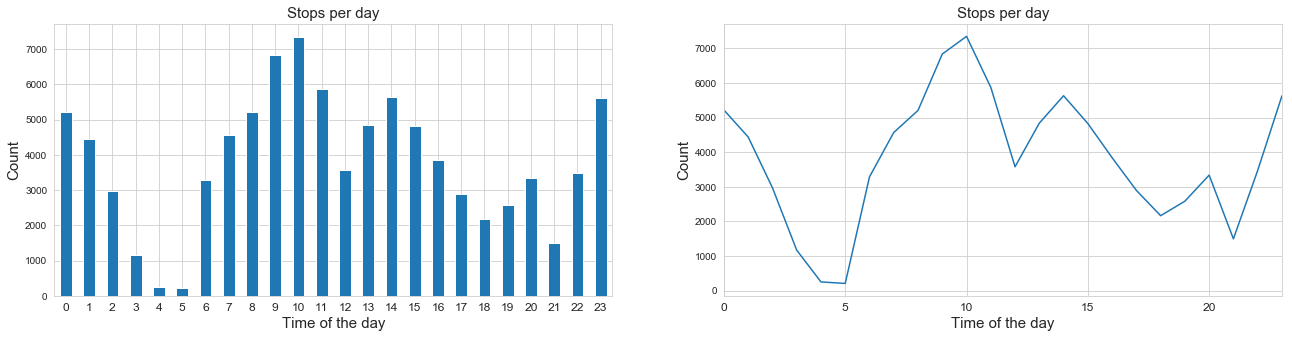

In [319]:
plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
df1.stop_datetime.dt.hour.value_counts().sort_index().plot.bar()
plt.title('Stops per day', fontsize=15)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)

plt.subplot(1,2,2)
df1.stop_datetime.dt.hour.value_counts().sort_index().plot()
plt.title('Stops per day', fontsize=15)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)

#### Answer: From the above diagrams we can conclude that most stops occur at DAY time(specially 9am-10pm) but not at NIGHT time.

# 10. Find bad data in stop_duration column and fix it.

In [324]:
df1.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

#### we are gonna replace these '1 and 2' with 'NaN'

In [330]:
df1.loc[(df1.stop_duration == '1') | (df1.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [332]:
df1.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [334]:
df1.loc[df1.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [335]:
df1.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64